# Spatial Analysis in Geology using R

## by Pedro Nogueira

##  <span style="color:red;">8. Putting it all to work: Part I </span>

In [1]:
#08-00
# Settings


# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks"


## <span style="color:green;">8.1 Reading the data</span>

In [2]:
#08-01/01
# Northern Territory Government Case Study
# For more information goto
# https://data.nt.gov.au/dataset/northern-territory-geological-survey-geochemistry-stream-sediment
# Complementary data
# https://geoscience.nt.gov.au/downloads/NTWideDownloads.html
sediment_url = "http://geoscience.nt.gov.au/contents/prod/Downloads/Geochemistry/GEOCHEM_STREAM_SEDIMENTS_csv.zip"

# Download the File
nt_ss = download.file(sediment_url, destfile = "NT_Stream Sediments.zip")

# unzip the file
unzip(zipfile = "NT_Stream Sediments.zip", exdir = 'NT_SS')

# Read the File
nt_ss = read.csv("NT_SS/GEOCHEM_STREAM_SEDIMENTS.csv")

In [3]:
#08-01/02
# Retrieve the variable names in the Territory Government data
colnames(nt_ss)

[1] "UNIQ_ID"        "ID"             "SAMPLEID"       "SAMPLEREF"     
  [5] "SAMPLE_TYPE"    "SAMPLE_METHOD"  "DATE_SAMPLED"   "LONGITUDE"     
  [9] "LATITUDE"       "LITHOLOGY"      "MINMESH"        "MAXMESH"       
 [13] "SAMPLEWT"       "COMPANY"        "ACCURACY"       "TITLE"         
 [17] "MAP_SHEET_100K" "MAP_SHEET_250K" "REPORT_NO"      "OPEN_FILE"     
 [21] "JOB_NO"         "COMMENTS"       "AG_PPB"         "AG_PPM"        
 [25] "AL_PCT"         "AL_PPM"         "AL2O3_PCT"      "AS_PPB"        
 [29] "AS_PPM"         "AU_PCT"         "AU_PPB"         "AU_PPM"        
 [33] "AU_PPT"         "AU1_PPB"        "AU1_PPM"        "AU2_PPB"       
 [37] "AU2_PPM"        "AU3_PPB"        "AU3_PPM"        "AU4_PPB"       
 [41] "AU5_PPB"        "B_PPM"          "BA_PCT"         "BA_PPB"        
 [45] "BA_PPM"         "BAO_PCT"        "BAO_PPM"        "BE_PPM"        
 [49] "BI_PCT"         "BI_PPB"         "BI_PPM"         "BI1_PPM"       
 [53] "BLWT_G"         "BR_PPM"         "C_PCT"          "CA_PCT"        
 [57] "CA_PPM"         "CAO_PCT"        "CAO_PPM"        "CD_PCT"        
 [61] "CD_PPB"         "CD_PPM"         "CE_PPM"         "CL_PCT"        
 [65] "CL_PPM"         "CO_PPB"         "CO_PPM"         "CO2_PCT"       
 [69] "CR_PPB"         "CR_PPM"         "CR2O3_PCT"      "CR2O3_PPM"     
 [73] "CS_PPM"         "CU_PCT"         "CU_PPB"         "CU_PPM"        
 [77] "CU1_PPM"        "CUO_PCT"        "DY_PPM"         "ER_PPM"        
 [81] "EU_PPM"         "F_PCT"          "F_PPM"          "FE_PCT"        
 [85] "FE_PPM"         "FE2O3_PCT"      "FE2O3_PPM"      "FE2O3T_PCT"    
 [89] "FEO_PCT"        "FEOXT_PCT"      "GA_PPM"         "GD_PPM"        
 [93] "GE_PPM"         "H2OMIN_PCT"     "H2OPLUS_PCT"    "HF_PPM"        
 [97] "HG_PCT"         "HG_PPB"         "HG_PPM"         "HO_PPM"        
[101] "IN_PPM"         "IR_PPB"         "K_PCT"          "K_PPM"         
[105] "K2O_PCT"        "K2O_PPM"        "LA_PPM"         "LI_PPM"        
[109] "LOI_PCT"        "LU_PPM"         "MG_PCT"         "MG_PPM"        
[113] "MGO_PCT"        "MGO_PPM"        "MN_PCT"         "MN_PPB"        
[117] "MN_PPM"         "MNO_PCT"        "MNO_PPM"        "MO_PPB"        
[121] "MO_PPM"         "MO1_PPM"        "NA_PCT"         "NA_PPM"        
[125] "NA2O_PCT"       "NA2O_PPM"       "NB_PPM"         "ND_PPM"        
[129] "NI_PPB"         "NI_PPM"         "OS_PPB"         "P_PCT"         
[133] "P_PPM"          "P2O5_PCT"       "P2O5_PPM"       "PB_PCT"        
[137] "PB_PPB"         "PB_PPM"         "PB1_PPM"        "PBT_PPB"       
[141] "PBT_PPM"        "PD_PCT"         "PD_PPB"         "PD_PPM"        
[145] "PD1_PPB"        "PR_PPM"         "PT_PCT"         "PT_PPB"        
[149] "PT_PPM"         "PT1_PPB"        "RB_PPM"         "RE_PPM"        
[153] "RH_PPB"         "RU_PPB"         "RU_PPM"         "S_PCT"         
[157] "S_PPM"          "SB_PPB"         "SB_PPM"         "SC_PPM"        
[161] "SE_PPB"         "SE_PPM"         "SI_PCT"         "SIO2_PCT"      
[165] "SM_PPM"         "SN_PCT"         "SN_PPB"         "SN_PPM"        
[169] "SO3_PCT"        "SR_PPM"         "SRO_PCT"        "TA_PPM"        
[173] "TB_PPM"         "TE_PPB"         "TE_PPM"         "TH_PPB"        
[177] "TH_PPM"         "TI_PCT"         "TI_PPB"         "TI_PPM"        
[181] "TIO2_PCT"       "TIO2_PPM"       "TL_PPB"         "TL_PPM"        
[185] "TM_PPM"         "TOT_C_PCT"      "TOT_S_PCT"      "TOTAL_PCT"     
[189] "U_PPB"          "U_PPM"          "V_PCT"          "V_PPB"         
[193] "V_PPM"          "V2O5_PPM"       "W_PPB"          "W_PPM"         
[197] "W1_PPM"         "Y_PPM"          "YB_PPM"         "ZN_PCT"        
[201] "ZN_PPB"         "ZN_PPM"         "ZR_PCT"         "ZR_PPB"        
[205] "ZR_PPM"

###  <span style="color:green;">8.2 Insights from the data</span>

In [4]:
#08-01/03
# Retrieve the LITHOLOGY column data
unique(nt_ss$LITHOLOGY)

[1] ""                      "silt"                  "greywacke"            
 [4] "shale"                 "quartz vein"           "dolerite"             
 [7] "tuff"                  "sand"                  "soil"                 
[10] "laterite"              "siltstone"             "unclassified sediment"
[13] "conglomerate"          "dolomite/dolostone"    "limestone"            
[16] "chert"                 "gravel"                "pisolitic ironstone"  
[19] "basalt"                "quartzite"             "rhyolite"             
[22] "calcrete"              "fault shear zone"      "ironstone"            
[25] "quartz-feldspar rock"  "loam"

In [5]:
#08-01/04
# Retrieve the COMPANY column data
unique(nt_ss$COMPANY)

[1] "Tidegate Pty Ltd."                                                          
  [2] "Stockdale Prospecting Ltd."                                                 
  [3] "Normandy Exploration (Darwin)"                                              
  [4] "Poseidon"                                                                   
  [5] "Mt Isa Mines Ltd"                                                           
  [6] "Exodus Minerals Limited"                                                    
  [7] "Carpentaria Exploration Co Pty Ltd"                                         
  [8] "CRA Exploration Pty Ltd."                                                   
  [9] "Roebuck Resources N.L."                                                     
 [10] "Saturn Resources PTY LTD"                                                   
 [11] "Gutnick resources NL"                                                       
 [12] "Normandy Exploration Limited"                                               
 [13] "Tanami Gold NL"                                                             
 [14] "Centralfield Minerals."                                                     
 [15] "Clarence River Finance Group PTY LTD"                                       
 [16] "BHP Minerals Ltd"                                                           
 [17] "Rio Tinto Exploration Pty Limited"                                          
 [18] "Acacia Resources"                                                           
 [19] "Zapopan NL."                                                                
 [20] "Torcon Pty Ltd"                                                             
 [21] "G K Bogie"                                                                  
 [22] "Restech Australia Ltd"                                                      
 [23] "Ktratos Exploration NL."                                                    
 [24] "Palladin Resources Pty. Ltd."                                               
 [25] "Nullabor Holdings"                                                          
 [26] "North Flinders Exploration"                                                 
 [27] "Mines Administration Pty Ltd."                                              
 [28] "A.O. (Australia) Pty Ltd."                                                  
 [29] "Esso Australia Ltd."                                                        
 [30] "Sabminco N.L."                                                              
 [31] "Mobil Energy Minerals Aust Inc."                                            
 [32] "Golden Plateau NL."                                                         
 [33] "Aurora Gold Ltd"                                                            
 [34] "Normandy NFM Ltd"                                                           
 [35] "Helix Resources NL"                                                         
 [36] "NTGS"                                                                       
 [37] "Johnson's Well Mining NL"                                                   
 [38] "Ashton Mining Ltd."                                                         
 [39] "Pasminco Exploration"                                                       
 [40] "Amoco Minerals Aust Co"                                                     
 [41] "Afmeco Mining and Exploration Pty Ltd"                                      
 [42] "Dampier Mining Co Ltd"                                                      
 [43] "Eupene Exploration Enterprises Pty Ltd."                                    
 [44] "Geopeko"                                                                    
 [45] "Small Company"                                                              
 [46] "Pancontinental Mining Ltd"                                                  
 [47] "Northern Gold NL."                                                          
 [48] "Colchis Mining Corporation Pty Ltd"            

In [6]:
#08-02
# Verifying the companies with more than 1000 samples
for(company_name in unique(nt_ss$COMPANY)) {
    # Select the company by company name
    query = nt_ss$COMPANY == company_name
    if( sum(query)>1000 ){# verify if the number of samples is higher than 1000
        
    # print the result
    print( paste(company_name,"with", sum(query), "samples selected"))
    }
}

[1] "Stockdale Prospecting Ltd. with 2661 samples selected"
[1] "Mt Isa Mines Ltd with 21690 samples selected"
[1] "Carpentaria Exploration Co Pty Ltd with 2351 samples selected"
[1] "CRA Exploration Pty Ltd. with 5853 samples selected"
[1] "BHP Minerals Ltd with 7066 samples selected"
[1] "Zapopan NL. with 1342 samples selected"
[1] "Golden Plateau NL. with 2061 samples selected"
[1] "Normandy NFM Ltd with 1445 samples selected"
[1] "NTGS with 2012 samples selected"
[1] "Amoco Minerals Aust Co with 1369 samples selected"
[1] "Pancontinental Mining Ltd with 1030 samples selected"
[1] "Bureau of Mineral Resources, Geology and Geophysics with 1534 samples selected"
[1] "Australasian Minerals, Inc. with 16072 samples selected"
[1] "Australia-Cities Service Inc with 2651 samples selected"
[1] "Australian Geophysical Pty. Ltd. with 1597 samples selected"
[1] "Autopool; Mobil Energy Minerals Australia with 1920 samples selected"
[1] "BHP Minerals with 1036 samples selected"
[1] "Stockdale Pr

###  <span style="color:green;">8.3 Subsetting data</span>

In [7]:
#08-03
# Example query for selecting the Rio Tinto [78]
query = nt_ss$COMPANY == 'Rio Tinto Exploration Pty Ltd'

# Results obtained
print(paste(sum(query), "samples selected"))

# Make the subsetting using bracketing
nt_ss_01 = nt_ss[query, ]

[1] "383 samples selected"


In [8]:
#08-04/01
# Remove columns that are NA
na_cols = which(base::colSums(is.na(nt_ss_01)) == nrow(nt_ss_01))

# Subset the data frame to exclude the all-NA columns
nt_ss_01_filtered = nt_ss_01[ , -na_cols]

In [9]:
#08-04/02
# Retrieve the NA columns
print(paste(length(na_cols), "NA columns rejected"))

# Retrieve the columns filtered
print(paste(ncol(nt_ss_01_filtered),"columns present"))

[1] "2 NA columns rejected"
[1] "203 columns present"


###  <span style="color:green;">8.4 Transforming data</span>

In [11]:
#08-05
# Find the columns with all NA values
nt_ss_02 = nt_ss_01_filtered
na_cols = which(base::colSums(nt_ss_02 == -9999) == nrow(nt_ss_02))

# Print the results
print(paste(length(na_cols),"rejected columns with -9999"))

# Subset the data frame to exclude all the NA columns
nt_ss_10 = nt_ss_02[ , -na_cols]

# Print the results
print(paste(ncol(nt_ss_10),"columns present"))

# Replace all the -9999 remaining by NA
nt_ss_10[nt_ss_10 == -9999] = NA

[1] "103 rejected columns with -9999"
[1] "100 columns present"


###  <span style="color:green;">8.5 Plotting the data</span>

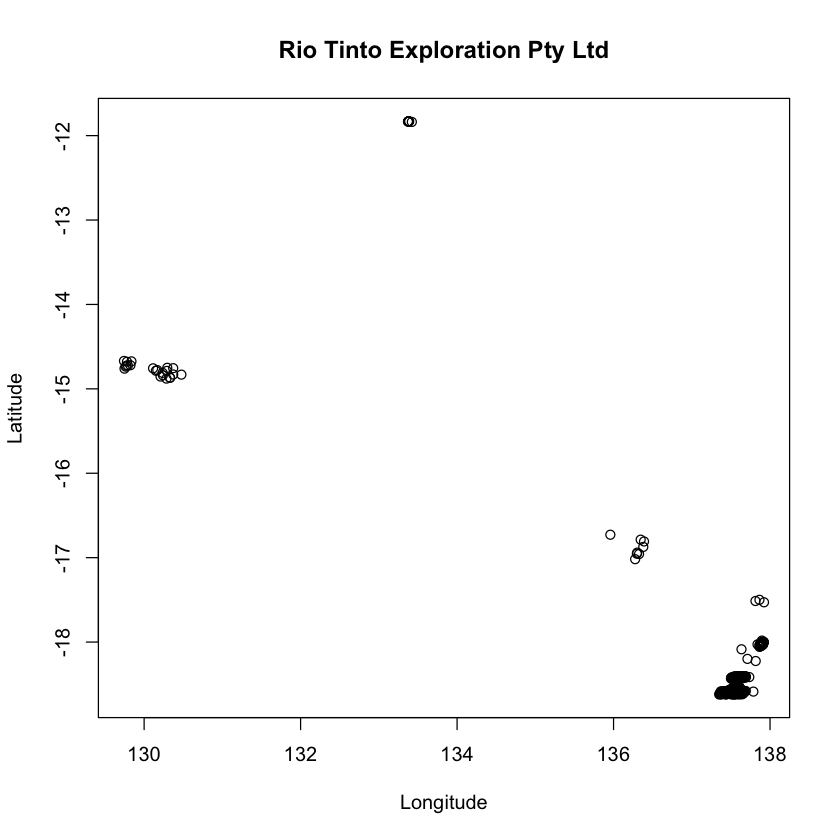

In [12]:
# Plot the data
plot(x=nt_ss_10$LONGITUDE, y=nt_ss_10$LATITUDE, 
     main = "Rio Tinto Exploration Pty Ltd",
     xlab = "Longitude", ylab = "Latitude")

[1] "Stockdale Prospecting Ltd. with 2661 samples selected"
[1] "Mt Isa Mines Ltd with 21690 samples selected"
[1] "Carpentaria Exploration Co Pty Ltd with 2351 samples selected"
[1] "CRA Exploration Pty Ltd. with 5853 samples selected"
[1] "BHP Minerals Ltd with 7066 samples selected"
[1] "Zapopan NL. with 1342 samples selected"
[1] "Golden Plateau NL. with 2061 samples selected"
[1] "Normandy NFM Ltd with 1445 samples selected"


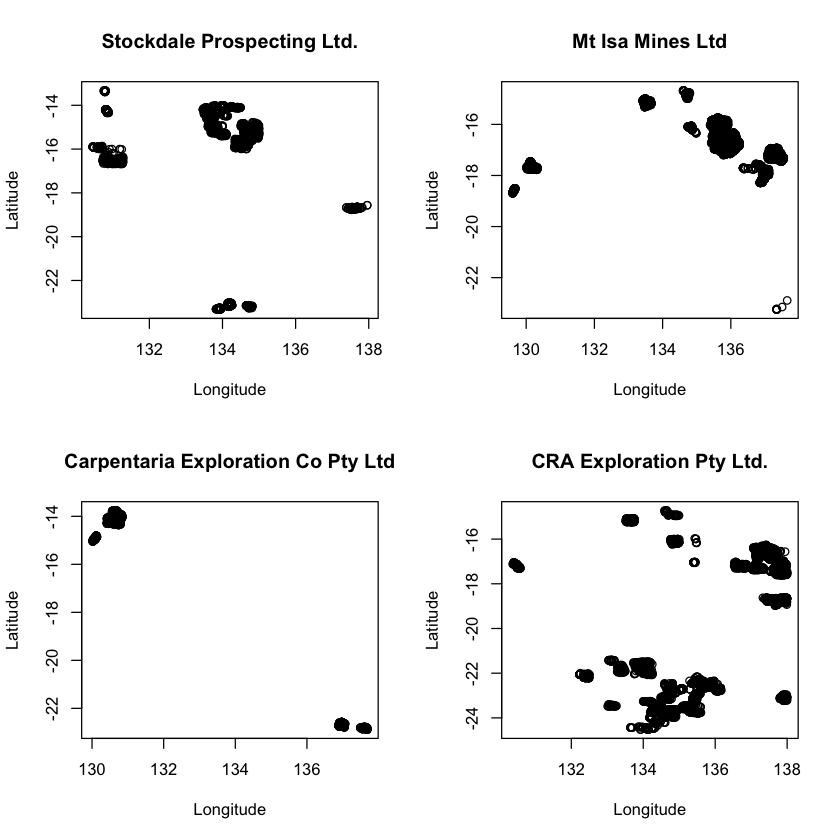

[1] "NTGS with 2012 samples selected"
[1] "Amoco Minerals Aust Co with 1369 samples selected"
[1] "Pancontinental Mining Ltd with 1030 samples selected"
[1] "Bureau of Mineral Resources, Geology and Geophysics with 1534 samples selected"


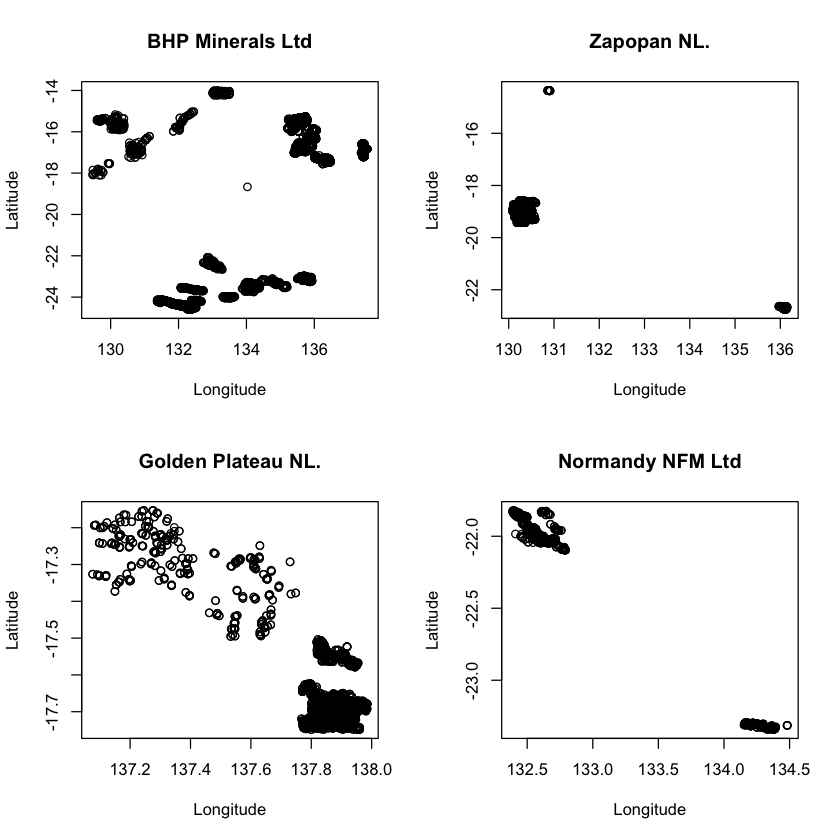

[1] "Australasian Minerals, Inc. with 16072 samples selected"
[1] "Australia-Cities Service Inc with 2651 samples selected"
[1] "Australian Geophysical Pty. Ltd. with 1597 samples selected"
[1] "Autopool; Mobil Energy Minerals Australia with 1920 samples selected"


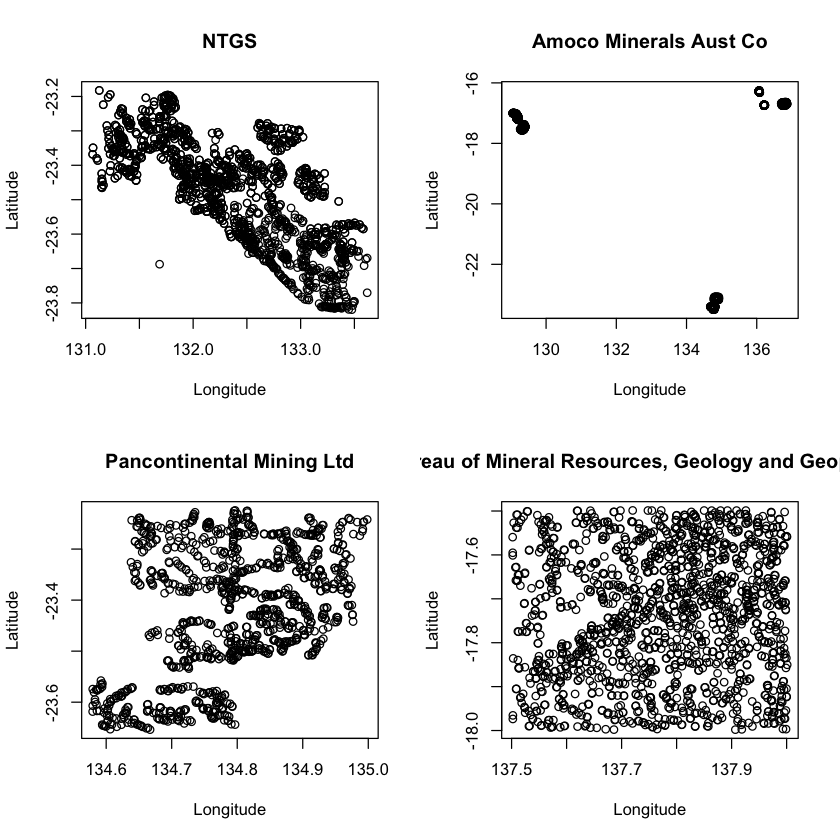

[1] "BHP Minerals with 1036 samples selected"
[1] "Stockdale Prospecting with 1390 samples selected"
[1] "Metals Exploration N.L. with 2387 samples selected"
[1] "Western Mining Corporation with 2698 samples selected"


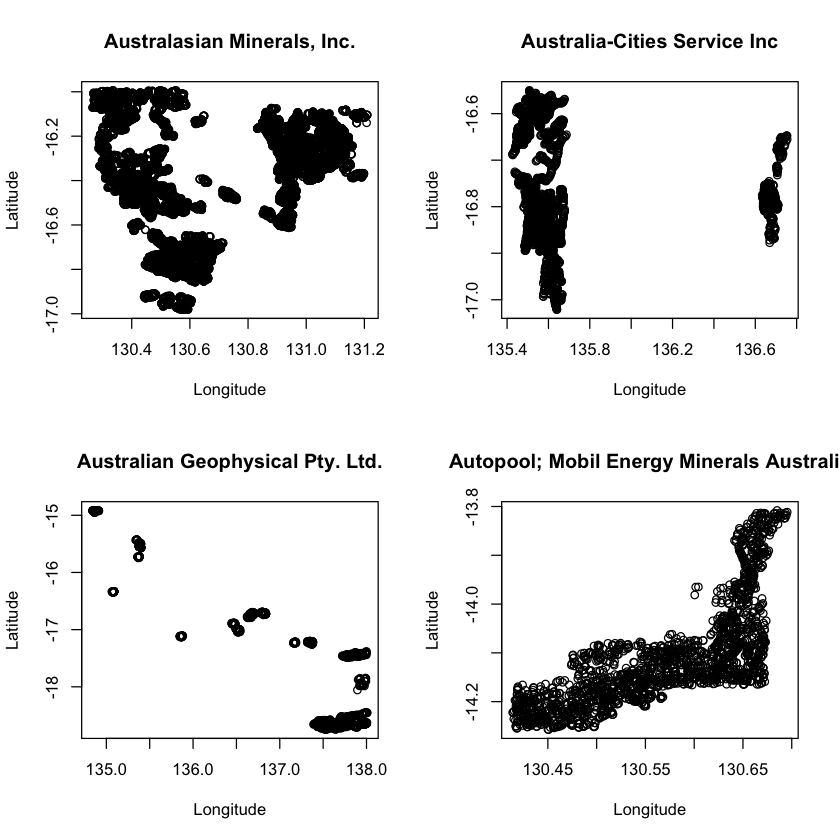

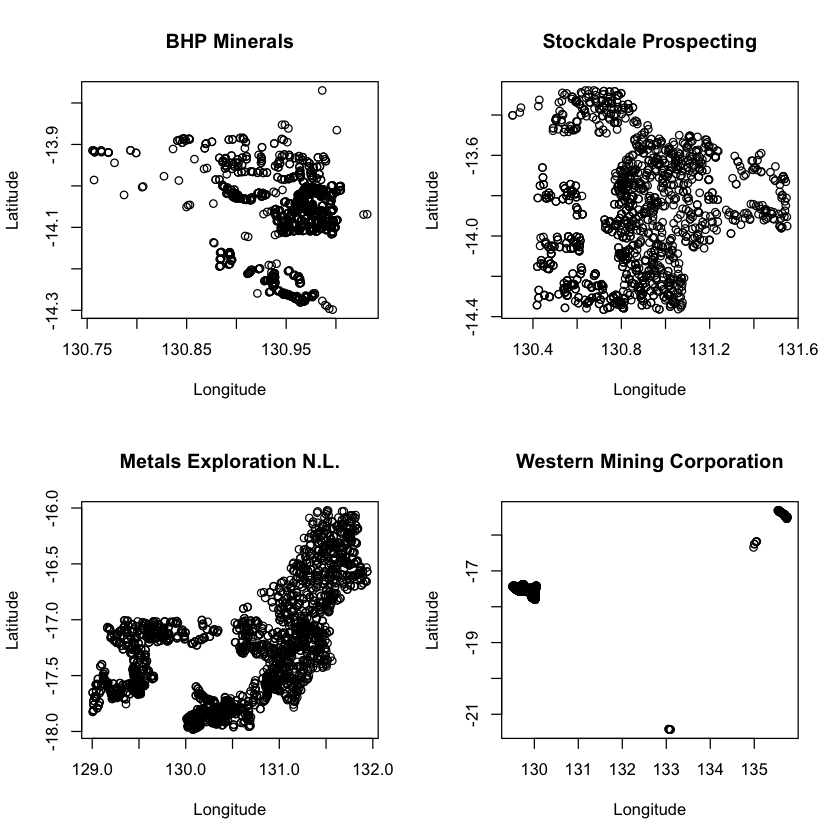

In [13]:
#08-07
# Create a 2x2 layout of plots using par()
par(mfrow = c(2, 2))

# Verifying the companies with more than 1000 samples
for(company_name in unique(nt_ss$COMPANY)) {
    # Select the company by company name
    query = nt_ss$COMPANY == company_name
    if( sum(query)>1000 ){ # verify if the number of samples is higher than 1000
        
    # print the result
    print( paste(company_name,"with", sum(query), "samples selected"))
        
    # Create a data frame with the result
    df = nt_ss[ query,]
        
    # Plot the data from the data frame
    plot(x=df$LONGITUDE, y=df$LATITUDE, main = company_name,
         xlab = "Longitude", ylab = "Latitude")
    }
}

###  <span style="color:green;">8.6 The Bureau of Mineral Resources subset</span>

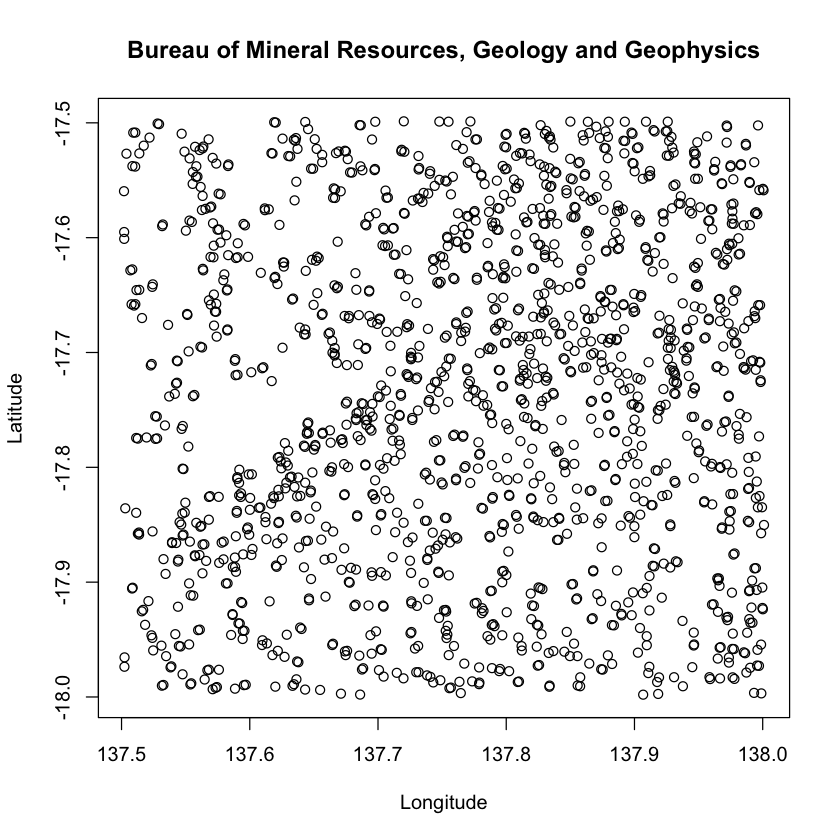

In [14]:
#08-08
# Filter the dataset
company_name = grepl("^Bureau of Mineral", nt_ss$COMPANY)
query = nt_ss$COMPANY == company_name

# Create the subset
nt_ss_bmrgg = nt_ss[company_name,]

# Verify if the result is good
title = "Bureau of Mineral Resources, Geology and Geophysics"

# Plot the data
par(mfrow = c(1, 1))
plot(x=nt_ss_bmrgg$LONGITUDE, y=nt_ss_bmrgg$LATITUDE,
main = title, xlab = "Longitude", ylab = "Latitude")

In [15]:
#08-09
# Remove columns that are NA
na_cols = which(base::colSums(is.na(nt_ss_bmrgg)) == nrow(nt_ss_bmrgg))
print(paste(length(na_cols), "NA columns rejected"))

# Subset the data frame to exclude the all-NA columns
nt_ss_bmrgg_filtered = nt_ss_bmrgg[, -na_cols]
print(paste(ncol(nt_ss_bmrgg_filtered),"columns present"))

# Remove -9999 columns
# Find the columns with all NA values
na_cols = which(colSums(nt_ss_bmrgg_filtered == -9999) ==
nrow(nt_ss_bmrgg_filtered ))
print(paste(length(na_cols),"-9999 columns rejected"))

# Subset the data frame to exclude the all-NA columns
nt_ss_bmrgg_10 = nt_ss_bmrgg_filtered[, -na_cols]
print(paste(ncol(nt_ss_bmrgg_10),"columns present"))

# Replace all the -9999 remaining by NA
nt_ss_bmrgg_10[nt_ss_bmrgg_10 == -9999] = NA
colnames(nt_ss_bmrgg_10)

[1] "2 NA columns rejected"
[1] "203 columns present"
[1] "165 -9999 columns rejected"
[1] "38 columns present"


[1] "UNIQ_ID"        "ID"             "SAMPLEID"       "SAMPLEREF"     
 [5] "SAMPLE_TYPE"    "SAMPLE_METHOD"  "LONGITUDE"      "LATITUDE"      
 [9] "LITHOLOGY"      "MINMESH"        "MAXMESH"        "COMPANY"       
[13] "ACCURACY"       "TITLE"          "MAP_SHEET_100K" "MAP_SHEET_250K"
[17] "REPORT_NO"      "OPEN_FILE"      "JOB_NO"         "COMMENTS"      
[21] "AG_PPM"         "AS_PPM"         "BA_PPM"         "BI_PPM"        
[25] "CO_PPM"         "CR_PPM"         "CU_PPM"         "FE_PCT"        
[29] "MN_PPM"         "MO_PPM"         "NI_PPM"         "PB_PPM"        
[33] "SN_PPM"         "TH_PPM"         "TI_PPM"         "U_PPM"         
[37] "W_PPM"          "ZN_PPM"

In [19]:
#08-10
# Create Bureau Mineral Research dataset
bmrgg = nt_ss_bmrgg_10[,c(3,21:38)]

###  <span style="color:green;">8.7 Descriptive statistics</span>

In [20]:
#08-11/01
# Summarise the results
summary(bmrgg)

   SAMPLEID             AG_PPM            AS_PPM          BA_PPM      
 Length:1534        Min.   :-1.0000   Min.   :-1.00   Min.   :  10.0  
 Class :character   1st Qu.:-1.0000   1st Qu.: 2.00   1st Qu.: 176.2  
 Mode  :character   Median :-1.0000   Median : 3.00   Median : 343.0  
                    Mean   :-0.8872   Mean   : 3.61   Mean   : 410.1  
                    3rd Qu.:-1.0000   3rd Qu.: 4.00   3rd Qu.: 600.8  
                    Max.   : 7.0000   Max.   :22.00   Max.   :1730.0  
                                                                      
     BI_PPM           CO_PPM          CR_PPM           CU_PPM      
 Min.   :-2.000   Min.   :-1.00   Min.   :  3.00   Min.   :  2.00  
 1st Qu.:-2.000   1st Qu.: 3.00   1st Qu.: 19.00   1st Qu.:  8.00  
 Median :-2.000   Median : 7.00   Median : 29.00   Median : 13.00  
 Mean   :-1.098   Mean   :10.29   Mean   : 47.85   Mean   : 25.43  
 3rd Qu.:-2.000   3rd Qu.:12.00   3rd Qu.: 53.00   3rd Qu.: 26.00  
 Max.   :33.000   Max.  

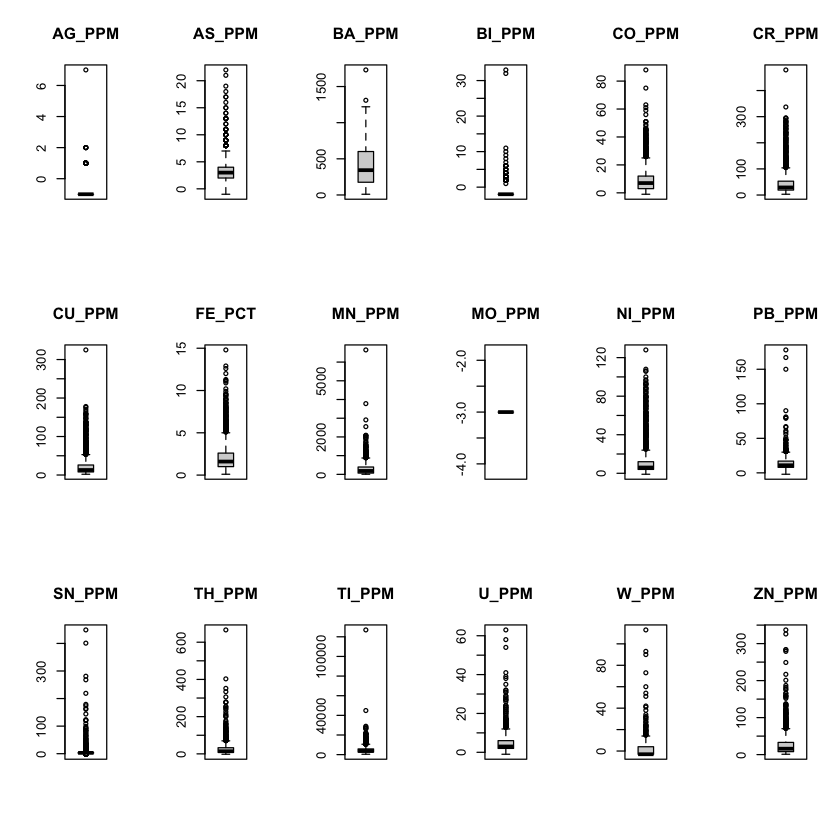

In [21]:
#08-11/02
# create a layout for the plot with 6 column by 3 row
par(mfrow = c(3, 6))

# loop over each variable and create a boxplot
for (i in 2:19) {
    boxplot(bmrgg[,i], main = colnames(bmrgg)[i])
}

In [22]:
#08-12
# Retrieve the number of outliers for each variable
# get the summary statistics for each variable
stats = lapply(bmrgg[ ,2:19], boxplot.stats)

# retrieve the number of outliers for each variable
outliers = sapply(stats, function(x) length(x$out))

# Show the results
outliers

AG_PPM AS_PPM BA_PPM BI_PPM CO_PPM CR_PPM CU_PPM FE_PCT MN_PPM MO_PPM NI_PPM 
    81     78      2    292    172    162    203    180    101      0    241 
PB_PPM SN_PPM TH_PPM TI_PPM  U_PPM  W_PPM ZN_PPM 
    65    578    121    123     96     45    132

In [23]:
#08-13
# Find the outliers using Tukey's fences method
fences = apply(bmrgg[,2:19], 2, function(x) {
    IQR = quantile(x, 0.75, na.rm=T) - quantile(x, 0.25, na.rm=T)
    upper_fence = quantile(x, 0.75, na.rm=T) + 1.5 * IQR
    lower_fence = quantile(x, 0.25, na.rm=T) - 1.5 * IQR
    outliers = x[x < lower_fence | x > upper_fence]
    return(outliers)
})

# Print the outliers for each variable
print(length(fences$AG_PPM))

[1] 81


In [24]:
#08-14
# compute the correlation matrix
cor_mat = cor(bmrgg[ ,2:19])

# Show the result but with only 2 decimal places
round(cor_mat, 2)

Warning message in cor(bmrgg[, 2:19]):
“the standard deviation is zero”


,AG_PPM,AS_PPM,BA_PPM,BI_PPM,CO_PPM,CR_PPM,CU_PPM,FE_PCT,MN_PPM,MO_PPM,NI_PPM,PB_PPM,SN_PPM,TH_PPM,TI_PPM,U_PPM,W_PPM,ZN_PPM
AG_PPM,1.00,-0.01,0.23,0.17,0.24,NA,0.39,0.26,NA,NA,0.13,0.13,0.17,-0.03,0.22,0.05,0.00,0.31
AS_PPM,-0.01,1.00,0.05,0.18,-0.06,NA,-0.04,0.03,NA,NA,-0.14,0.24,0.07,0.18,-0.01,0.20,0.18,0.01
BA_PPM,0.23,0.05,1.00,0.28,0.39,NA,0.28,0.26,NA,NA,0.27,0.35,0.23,0.28,0.19,0.32,0.22,0.36
BI_PPM,0.17,0.18,0.28,1.00,-0.02,NA,0.13,-0.05,NA,NA,-0.09,0.26,0.37,0.34,-0.01,0.50,0.33,0.01
CO_PPM,0.24,-0.06,0.39,-0.02,1.00,NA,0.82,0.84,NA,NA,0.82,0.08,-0.01,-0.07,0.64,-0.01,-0.06,0.76
CR_PPM,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CU_PPM,0.39,-0.04,0.28,0.13,0.82,NA,1.00,0.83,NA,NA,0.75,0.07,0.12,-0.12,0.66,0.01,-0.05,0.78
FE_PCT,0.26,0.03,0.26,-0.05,0.84,NA,0.83,1.00,NA,NA,0.76,0.02,-0.03,-0.15,0.72,-0.11,-0.10,0.82
MN_PPM,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
MO_PPM,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA,NA,NA,NA,NA


In [25]:
#08-15
# Select only the numeric data and excluding the Mo
data = bmrgg[ ,c(2:10,12:19)]

# Compute the correlation matrix
corr_matrix = cor(data, use="pairwise.complete.obs", method="pearson")

# Create a matrix to store the correlation categories
corr_categories = matrix(nrow = ncol(data), ncol = ncol(data))

# Loop through each pair of variables in the correlation matrix
for (i in 1:ncol(data)) {
    for (j in 1:ncol(data)) {  
        # Check the correlation coefficient for each pair
        corr = corr_matrix[i, j]
        # Categorize the correlation coefficient based on the cutoff values
        if (abs(corr) >= 0.7) {
            corr_categories[i, j] = "Strong"
            } else if (abs(corr) >= 0.4) {
                corr_categories[i, j] = "Moderate"
            } else if (abs(corr) >= 0) {
                corr_categories[i, j] = "Low"
        }
    }
}
# Print the correlation categories
rownames(corr_categories) = colnames(data)
colnames(corr_categories) = colnames(data)
print(corr_categories)

       AG_PPM   AS_PPM   BA_PPM   BI_PPM     CO_PPM     CR_PPM     CU_PPM    
AG_PPM "Strong" "Low"    "Low"    "Low"      "Low"      "Low"      "Low"     
AS_PPM "Low"    "Strong" "Low"    "Low"      "Low"      "Low"      "Low"     
BA_PPM "Low"    "Low"    "Strong" "Low"      "Low"      "Low"      "Low"     
BI_PPM "Low"    "Low"    "Low"    "Strong"   "Low"      "Low"      "Low"     
CO_PPM "Low"    "Low"    "Low"    "Low"      "Strong"   "Moderate" "Strong"  
CR_PPM "Low"    "Low"    "Low"    "Low"      "Moderate" "Strong"   "Moderate"
CU_PPM "Low"    "Low"    "Low"    "Low"      "Strong"   "Moderate" "Strong"  
FE_PCT "Low"    "Low"    "Low"    "Low"      "Strong"   "Moderate" "Strong"  
MN_PPM "Low"    "Low"    "Low"    "Low"      "Strong"   "Moderate" "Moderate"
NI_PPM "Low"    "Low"    "Low"    "Low"      "Strong"   "Strong"   "Strong"  
PB_PPM "Low"    "Low"    "Low"    "Low"      "Low"      "Low"      "Low"     
SN_PPM "Low"    "Low"    "Low"    "Low"      "Low"      "Low"   

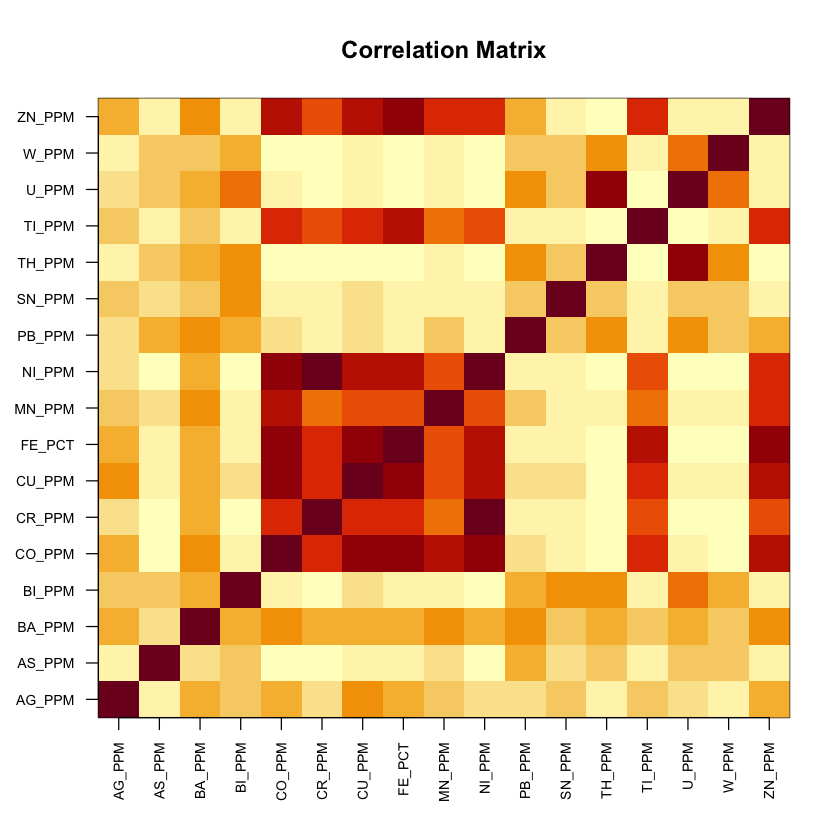

In [26]:
#08-16
# Create the image for the correlation matrix
par(mfrow = c(1, 1))
image(corr_matrix, main="Correlation Matrix", xaxt='n', yaxt='n')

# Add the axis labels
axis(side = 1, at = seq(0, 1, by=1/(ncol(data) -1)), labels =
colnames(data), las=2, cex.axis=.7)
axis(side = 2, at = seq(0, 1, by=1/(ncol(data) -1)), labels =
colnames(data), las=1, cex.axis=.7)

In [27]:
#08-17
# Load the library
library(psych)

# Only the numeric data,excluding the Mo (column 11)
data = bmrgg[ ,c(2:10,12:19)]

# Describe the results
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AG_PPM,1,1534,-0.8872229,0.5040537,-1.0,-1.0000000,0.00000,-1.0,7.0,8.0,5.6656318,49.1997442,0.01286957
AS_PPM,2,1534,3.6101695,2.3269713,3.0,3.3184039,1.48260,-1.0,22.0,23.0,2.3137159,10.1237102,0.05941257
BA_PPM,3,1534,410.1310300,266.9107005,343.0,385.6449511,284.65920,10.0,1730.0,1720.0,0.6997238,-0.2142594,6.81480299
BI_PPM,4,1534,-1.0977836,2.2167795,-2.0,-1.5480456,0.00000,-2.0,33.0,35.0,5.7202716,69.3031993,0.05659914
CO_PPM,5,1534,10.2868318,10.7297890,7.0,8.2182410,5.93040,-1.0,88.0,89.0,2.0426719,5.0728158,0.27395454
CR_PPM,6,1533,47.8545336,51.4143218,29.0,36.5998370,19.27380,3.0,479.0,476.0,2.6933373,9.0992084,1.31314606
CU_PPM,7,1534,25.4256845,30.7794908,13.0,18.2597720,8.89560,2.0,325.0,323.0,2.7281872,10.3092902,0.78586646
FE_PCT,8,1534,2.2806584,1.9915354,1.6,1.9051303,1.03782,0.1,14.8,14.7,1.9988798,4.5279607,0.05084817
MN_PPM,9,1528,299.6930628,379.4275848,183.0,230.2581699,197.18580,6.0,6650.0,6644.0,5.1489967,59.5777584,9.70660204


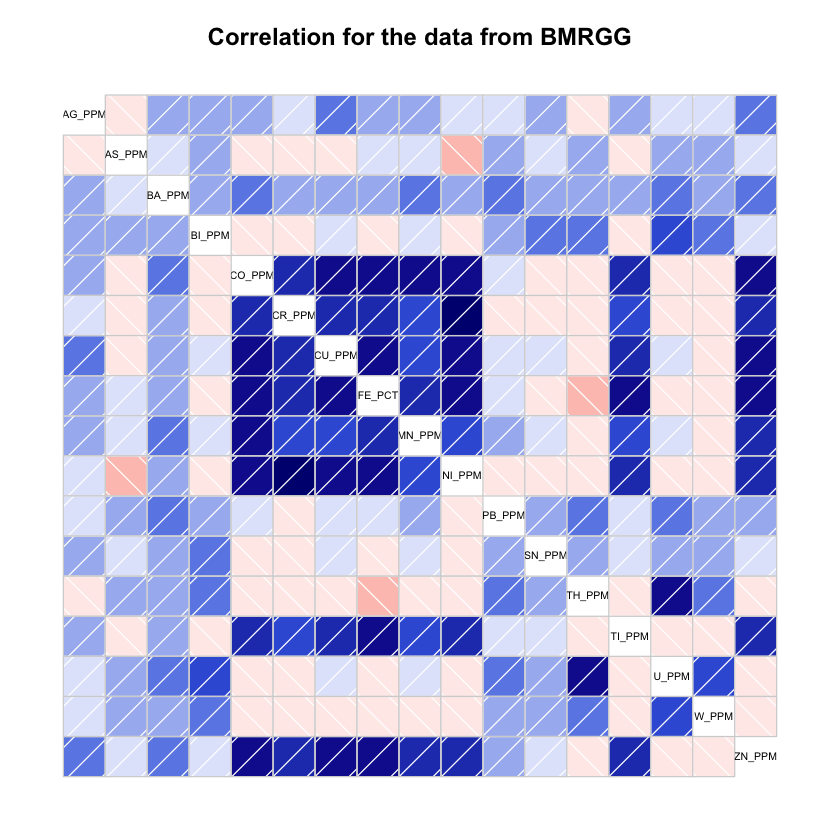

In [28]:
#08-18
# Load the library
library(corrgram)

# Use only the numerical data,excluding the Mo (column 11)
data = bmrgg[ ,c(2:10,12:19)]

# The corrgram
corrgram(data, main="Correlation for the data from BMRGG")

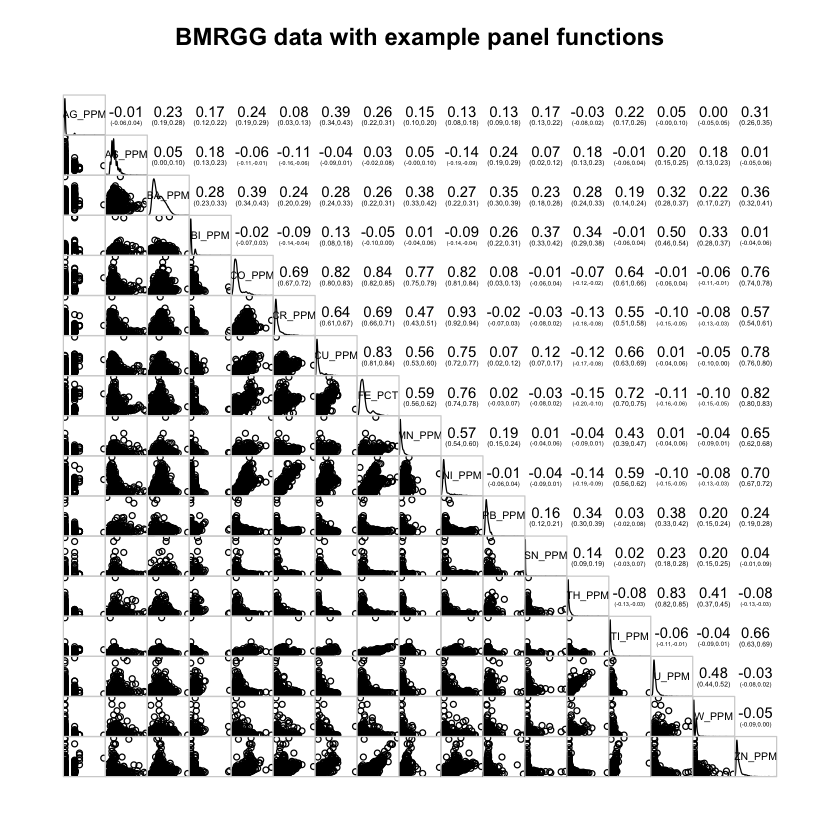

In [37]:
#08-19
# Demonstrate density panel, correlation confidence panel
options(warn=-1) # for no warnings in this case...
corrgram(data,
         main="BMRGG data with example panel functions",
         lower.panel=panel.pts, upper.panel=panel.conf,
         diag.panel=panel.density)
options(warn=0)